<a href="https://colab.research.google.com/github/Prathamgupta19/ardupilot/blob/master/prokect_9_gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

In [4]:
gold_dataset = pd.read_csv('/content/gld_price_data[1].csv')

In [5]:
gold_dataset.shape

(2290, 6)

In [6]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
correlation = gold_dataset.corr()

<ipython-input-11-a17bf32cf03a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_dataset.corr()


<Axes: >

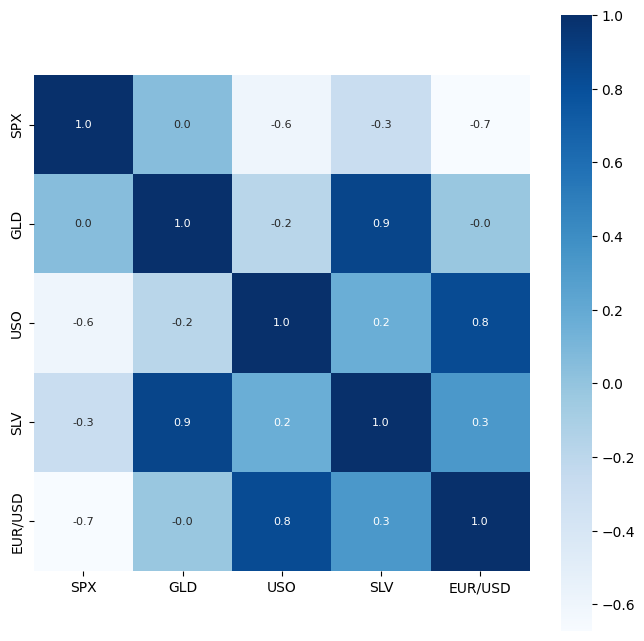

In [13]:
plt.figure( figsize = (8,8))
sns.heatmap(correlation, cbar = True , square = True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [14]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


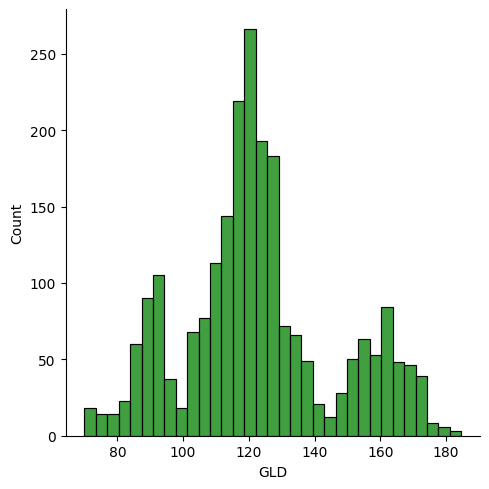

In [16]:
sns.displot(gold_dataset.GLD, color = 'Green')

In [18]:
X = gold_dataset.drop(['Date' , 'GLD'] , axis = 1)

In [19]:
Y = gold_dataset.GLD

In [20]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [21]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y ,test_size= 0.2, random_state = 2)

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
test_data_prediction = regressor.predict(X_test)

In [33]:
print(test_data_prediction)

[168.52709915  82.14089955 116.04920052 127.57600084 120.94420124
 154.68599795 150.42829813 126.03320056 117.37489889 125.97920059
 116.61030105 172.90950104 141.34629796 168.01819881 115.20889993
 117.68010053 138.60210389 169.91280099 159.86550346 159.27109871
 155.09510016 125.32080047 176.59470013 156.91370347 125.25570055
  93.63329937  77.08290021 120.76670005 119.13209959 167.44569922
  88.07540063 125.32850021  91.21950092 117.7221001  121.08919967
 136.96820133 115.51280122 115.31710073 147.31209949 107.03970135
 104.16550218  87.05899766 126.46720055 117.9668002  152.87759916
 119.70909994 108.36140008 108.07039818  93.03390025 127.12769774
  75.00450028 113.71359925 121.18450004 111.2100994  118.82549893
 120.39699949 159.34130012 166.67150103 146.87799695  86.12209872
  94.37360032  86.92099894  90.59780018 118.92510064 126.52080096
 127.56940045 170.16220038 122.29359938 117.3943989   98.84610024
 168.4511014  143.3852985  131.56010245 121.17640227 120.67399923
 119.79590

In [34]:
error_score = metrics.r2_score(test_data_prediction , Y_test)

In [35]:
print("R squared error : ", error_score)

R squared error :  0.9895368168611084
